<a href="https://colab.research.google.com/github/L0521/hufs-logic-programming/blob/main/CNN_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#202302834 이승준
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 이미지셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("이미지셋 이미지 수 : %d 개" % (train_images.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (test_images.shape[0]))

이미지셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [21]:
train_images, test_images = train_images / 255.0, test_images / 255.0
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

modelpath="./data/model/MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_images, train_labels, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(test_images, test_labels)[1]))


Epoch 1: val_loss improved from inf to 0.45272, saving model to ./data/model/MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.45272 to 0.38797, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.38797 to 0.37600, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.37600 to 0.36464, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.36464 to 0.32812, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.32812

Epoch 7: val_loss improved from 0.32812 to 0.32546, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 8: val_loss improved from 0.32546 to 0.32358, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 9: val_loss improved from 0.32358 to 0.30176, saving model to ./data/model/MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.30176

Epoch 11: val_loss did not improve from 0.30176

Epoch 12: val_loss did not improve from 0.30176

Epoch 13: val_loss did not improve from 0.30176

Epoch 14: val_loss improved from 0.30176 to 0.29641, saving model to ./data/

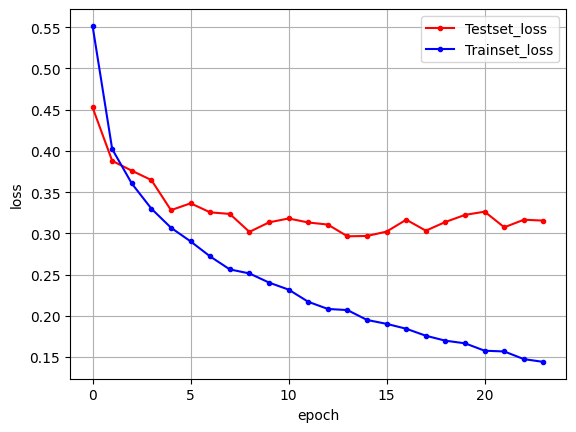

In [28]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()